In [243]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math

df = pd.read_csv("ex2data1.txt",delimiter=",")
df.head(3) 

,Exam_1,Exam_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0


In [244]:
Ex_1 = np.array(df['Exam_1'])
Ex_2 = np.array(df['Exam_2'])
choice = np.array(df['Admitted'])

m = len(Ex_1)

Adm_ex_1 = []
Adm_ex_2 = []
n_Adm_ex_1 = []
n_Adm_ex_2 = []

for i in range(len(Ex_1)):
    if choice[i]==1:
        Adm_ex_1.append(Ex_1[i])
        Adm_ex_2.append(Ex_2[i])
    else :
        n_Adm_ex_1.append(Ex_1[i])
        n_Adm_ex_2.append(Ex_2[i])

(30.0, 100.0)

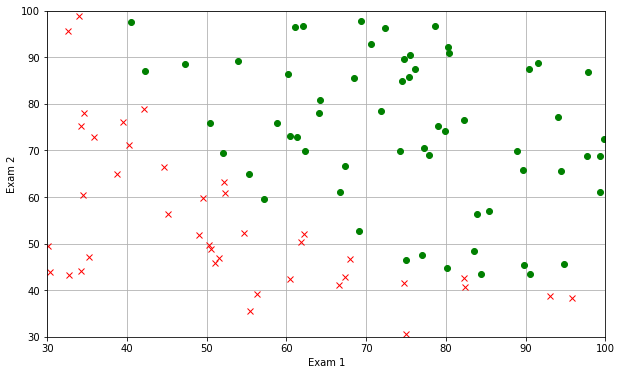

In [245]:
plt.figure(figsize=(10,6))
plt.plot(Adm_ex_1,Adm_ex_2,'o',color='green')
plt.plot(n_Adm_ex_1,n_Adm_ex_2,'rx',color='red') 
plt.grid(True)
plt.xlabel("Exam 1")  
plt.ylabel("Exam 2") 
plt.xlim([30,100])
plt.ylim([30,100]) 

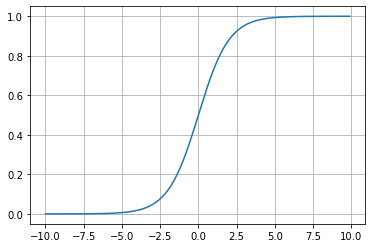

In [246]:
def sigmoid(z):
    return 1/(1+(math.e**-z))
x = np.arange(-10,10,0.1)
plt.plot(x,sigmoid(x))
plt.grid(True)

In [247]:
df['theta0'] = 1
df.head(3) 

,Exam_1,Exam_2,Admitted,theta0
0,34.623660,78.024693,0,1
1,30.286711,43.894998,0,1
2,35.847409,72.902198,0,1


### Normalizing the data 

We normalize this data using mean and standard deviation 

$ X =  \frac{X - X_{mean}}{X_{std}}$

In [248]:
df['Exam_1'] = (df['Exam_1'] - df['Exam_1'].std()) / df['Exam_1'].mean()
df['Exam_2'] = (df['Exam_2'] - df['Exam_2'].std()) / df['Exam_2'].mean()
df.head(3) 

,Exam_1,Exam_2,Admitted,theta0
0,0.231025,0.897616,0,1
1,0.164957,0.382233,0,1
2,0.249667,0.820262,0,1


In [249]:
X = np.array(df[['theta0','Exam_1','Exam_2']])
y = np.array(df[['Admitted']])
print(X.shape,y.shape) 

(100, 3) (100, 1)


In [250]:
def hyp(theta,X):
    return sigmoid(np.dot(X,theta))

In [251]:
intial_theta = np.zeros([3,1])
intial_theta.shape 

(3, 1)

In [252]:
def cost_function(theta,X_h,y_h,mylambda = 0.):
    fp =  np.dot(y_h.T,np.log(hyp(theta,X_h)))
    sp =   np.dot((1 - y_h).T,np.log(1 - hyp(theta,X_h)))
    return float(-np.sum(fp+sp)/m)   
    
cost_function(intial_theta,X,y)

0.6931471805599452

### Gradient descent

In [253]:
alpha = 1
theta_v = intial_theta
epochs = 15000
cost_func_graph = []

for i in range(epochs):
    theta_v = theta_v - alpha*np.dot(hyp(theta_v,X).T - y.T ,X ).T/m
    cost_func_graph.append(cost_function(theta_v,X,y))

In [260]:
theta = theta_v
print(theta_v,cost_function(theta_v,X,y) ) 
theta[0][0]

[[-17.32553411]
 [ 13.47810027]
 [ 13.28063962]] 0.20349963963122003


-17.325534108889862

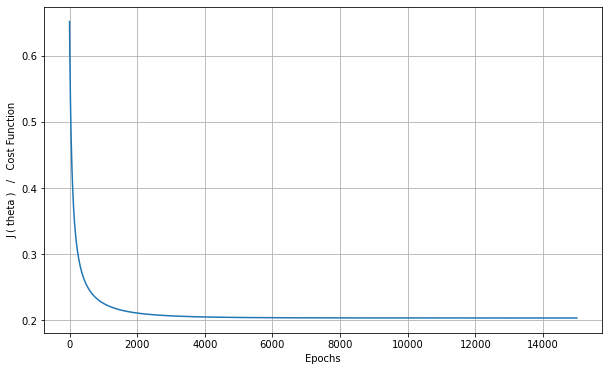

In [261]:
plt.figure(figsize=(10,6))
plt.plot([i for i in range(epochs)],cost_func_graph) 
plt.xlabel("Epochs")
plt.ylabel("J ( theta )   /   Cost Function")
plt.grid(True)

In [262]:
cor = 0
wro = 0
for xj,yj in zip(X,y) :
    if(hyp(theta_v,xj)*100 > 50):
        if(yj==1):
            cor = cor + 1 
        else:
            wro = wro + 1
    else : 
        if(yj==0):
            cor = cor + 1 
        else : 
            wro = wro + 1 
print(f"Correct : {cor}   ,   wrong : {wro}\nPercentage correct : {cor*100/(cor+wro)}%")

Correct : 89   ,   wrong : 11
Percentage correct : 89.0%


### Problems faced , which I found the answers to 

https://stackoverflow.com/questions/49315963/doing-andrew-ngs-logistic-regression-execrise-without-fminunc                     

The original excersize was to be solved using **fminuc** a *optimization function* , however I wrote the gradient descent part myself. Intially the data wasn't normalized . Because of this the sigmoid() function values were blowing up to infinity. Later after normalzing the data , the values did converge before any **regularization**

The solution using fminuc was : 

```python

from scipy import optimize
initial_theta = np.zeros((X.shape[1],1))

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(cost_function, x0=mytheta, args=(myX, myy, mylambda), maxiter=400, full_output=True)
    return result[0], result[1]

theta, mincost = optimizeTheta(initial_theta,X,y)
print(theta,mincost)

```
It gives us the values : 
```
Optimization terminated successfully.
Current function value: 0.203498
Iterations: 157
Function evaluations: 287
``` 

### Results
Theta was obtained by fitting a line to normalized data

$ X =  \frac{X - X_{mean}}{X_{std}}$


In [318]:
Ex_1 = np.array(df['Exam_1'])
Ex_2 = np.array(df['Exam_2'])
choice = np.array(df['Admitted'])

m = len(Ex_1)

Adm_ex_1 = []
Adm_ex_2 = []
n_Adm_ex_1 = []
n_Adm_ex_2 = []

for i in range(len(Ex_1)):
    if choice[i]==1:
        Adm_ex_1.append(Ex_1[i])
        Adm_ex_2.append(Ex_2[i])
    else :
        n_Adm_ex_1.append(Ex_1[i])
        n_Adm_ex_2.append(Ex_2[i])

(0.1, 1.3)

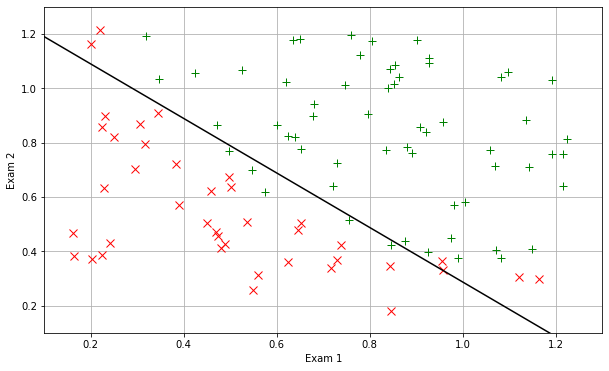

In [346]:
x1r = np.array(range(-1,3)) 
plt.figure(figsize=(10,6))
plt.grid(True)  
# plt.plot(df['Exam_1'],df['Exam_2'],'o',color='green')
plt.plot(Adm_ex_1,Adm_ex_2,'+',color = 'g' , markersize = 8)   
plt.plot(n_Adm_ex_1,n_Adm_ex_2,'rx',color = 'red' , markersize = 8)    
plt.plot(x1r, - ( -17.40 + 13.53*x1r)/13.49 , color = 'black')  
plt.xlabel("Exam 1")  
plt.ylabel("Exam 2") 
plt.xlim([0.1,1.3])    
plt.ylim([0.1,1.3])  